In [11]:
#|default_exp app

In [12]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

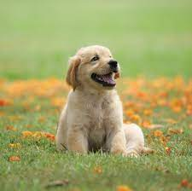

In [13]:
im = PILImage.create("dog.jpg")
im.thumbnail((192, 192))
im

In [14]:
#|export
learn = load_learner("model.pkl")

In [15]:
%time learn.predict(im)

CPU times: user 33.2 ms, sys: 20.9 ms, total: 54.2 ms
Wall time: 33.3 ms


('False', TensorBase(0), TensorBase([9.9998e-01, 1.8296e-05]))

In [16]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9998e-01, 1.8296e-05]))

In [17]:
#|export
categories = ("Dog", "Cat")

def classify_image(img):
    _, _, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [18]:
classify_image(im)

{'Dog': 0.9999817609786987, 'Cat': 1.8296283087693155e-05}

In [19]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ["dog.jpg", "cat.jpg", "dunno.jpg"]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/Users/a457934/git/minimal/.env/lib/python3.9/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/a457934/git/minimal/.env/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/a457934/git/minimal/.env/lib/python3.9/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/a457934/git/minimal/.env/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


### Export

In [20]:
from nbdev.export import nb_export

In [21]:
nb_export("app.ipynb", "./")